In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('../65 Years of Weather Data Bangladesh (1948 - 2013).csv')
df.head()

,No,Station_Names,YEAR,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01


In [3]:
df = df.drop(labels=["No","YEAR","Month","ALT","Period"], axis=1)

In [4]:
df.head()

,Station_Names,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE
0,Barisal,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36
1,Barisal,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36
2,Barisal,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36
3,Barisal,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36
4,Barisal,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36


In [4]:
df.shape

(21120, 14)

In [5]:
X= df.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12]]
y= df.iloc[:,5]

In [6]:
my_r = X.corr(method="spearman")
print(my_r)

                   Max_Temp  Min_Temp  Rainfall  Relative_Humidity  \
Max_Temp           1.000000  0.591803  0.414988           0.083809   
Min_Temp           0.591803  1.000000  0.768857           0.640280   
Rainfall           0.414988  0.768857  1.000000           0.695935   
Relative_Humidity  0.083809  0.640280  0.695935           1.000000   
Cloud_Coverage     0.457653  0.846894  0.875809           0.714258   
Bright_Sunshine   -0.117322 -0.594025 -0.670244          -0.733129   
Station_Number    -0.116881  0.089739  0.058318           0.114814   
X_COR             -0.156156 -0.019195  0.108649           0.105415   
Y_COR              0.085345 -0.092326 -0.044436          -0.089159   
LATITUDE           0.109293 -0.099725 -0.048431          -0.109718   
LONGITUDE         -0.153953 -0.017293  0.110156           0.105688   

                   Cloud_Coverage  Bright_Sunshine  Station_Number     X_COR  \
Max_Temp                 0.457653        -0.117322       -0.116881 -0.156156   

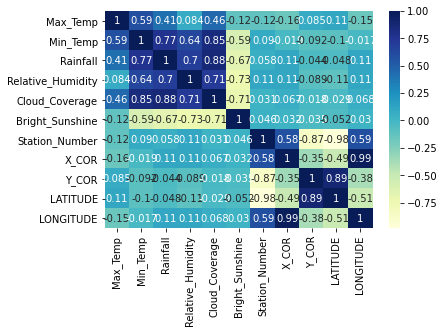

In [7]:
 
# plotting correlation heatmap
dataplot = sns.heatmap(X.corr(method="spearman"), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [6]:
StationName= pd.get_dummies(X["Station_Names"],drop_first=True)
X=X.drop("Station_Names",axis=1)
X=pd.concat([X,StationName],axis=1)

In [7]:
X.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,...,Rangamati,Rangpur,Sandwip,Satkhira,Sitakunda,Srimangal,Syedpur,Sylhet,Tangail,Teknaf
0,29.4,12.3,0.0,68.0,0.6,7.831915,41950,536809.8,510151.9,22.7,...,0,0,0,0,0,0,0,0,0,0
1,30.0,14.1,0.0,77.0,0.8,7.831915,41950,536809.8,510151.9,22.7,...,0,0,0,0,0,0,0,0,0,0
2,28.2,12.3,0.0,77.0,0.6,7.831915,41950,536809.8,510151.9,22.7,...,0,0,0,0,0,0,0,0,0,0
3,26.6,12.3,2.0,77.0,1.0,7.831915,41950,536809.8,510151.9,22.7,...,0,0,0,0,0,0,0,0,0,0
4,30.0,13.3,10.0,75.0,1.6,7.831915,41950,536809.8,510151.9,22.7,...,0,0,0,0,0,0,0,0,0,0


In [8]:
## train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.linear_model import Lasso

# Train the model

lasso = Lasso(alpha=.05)
lasso.fit(X_train,y_train)

y_pred = lasso.predict(X_test)

from sklearn.metrics import r2_score
score= r2_score(y_test,y_pred)
score

0.27040431213875793

In [9]:
## train with PCA

### PCA
from sklearn.decomposition import PCA
pca = PCA (n_components=5)
pca.fit(X)
x_pca= pca.transform(X)
# x_pca

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_pca,y,test_size=0.2,random_state=0)

from sklearn.linear_model import Lasso

# Train the model

lasso = Lasso(alpha=.05)
lasso.fit(X_train,y_train)

y_pred = lasso.predict(X_test)

from sklearn.metrics import r2_score
score= r2_score(y_test,y_pred)
score

0.1517606236976089

In [10]:
### StandardScaler  => lasso

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
scaled_data= scaler.transform(X)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(scaled_data,y,test_size=0.2,random_state=0)

from sklearn.linear_model import Lasso

# Train the model

lasso = Lasso(alpha=.05)
lasso.fit(X_train,y_train)

y_pred = lasso.predict(X_test)

from sklearn.metrics import r2_score
score= r2_score(y_test,y_pred)
score

0.3525981088764245